In [1]:
raw_data = read.csv("D:\\cars.csv")

In [18]:
colnames(raw_data)

[1] "mpg"         "cylinders"   "cubicinches" "hp"          "weightlbs"  
[6] "time.to.60"  "year"        "brand"

In [2]:
data = na.omit(raw_data)

In [3]:
x = data[-c(1)]

In [4]:
x = x[-c(7)]

In [5]:
y = data[c(1)]

In [106]:
corr_matrix = round(cor(x), 2)

In [107]:
which(abs(corr_matrix) > 0.9 & corr_matrix < 1, arr.ind = TRUE)

,row,col
cubicinches,2,1
cylinders,1,2
hp,3,2
weightlbs,4,2
cubicinches,2,3
cubicinches,2,4


In [108]:
corr_matrix

,cylinders,cubicinches,hp,weightlbs,time.to.60,year
cylinders,1.00,0.95,0.85,0.90,-0.58,-0.33
cubicinches,0.95,1.00,0.91,0.93,-0.61,-0.36
hp,0.85,0.91,1.00,0.86,-0.75,-0.39
weightlbs,0.90,0.93,0.86,1.00,-0.49,-0.28
time.to.60,-0.58,-0.61,-0.75,-0.49,1.00,0.32
year,-0.33,-0.36,-0.39,-0.28,0.32,1.00


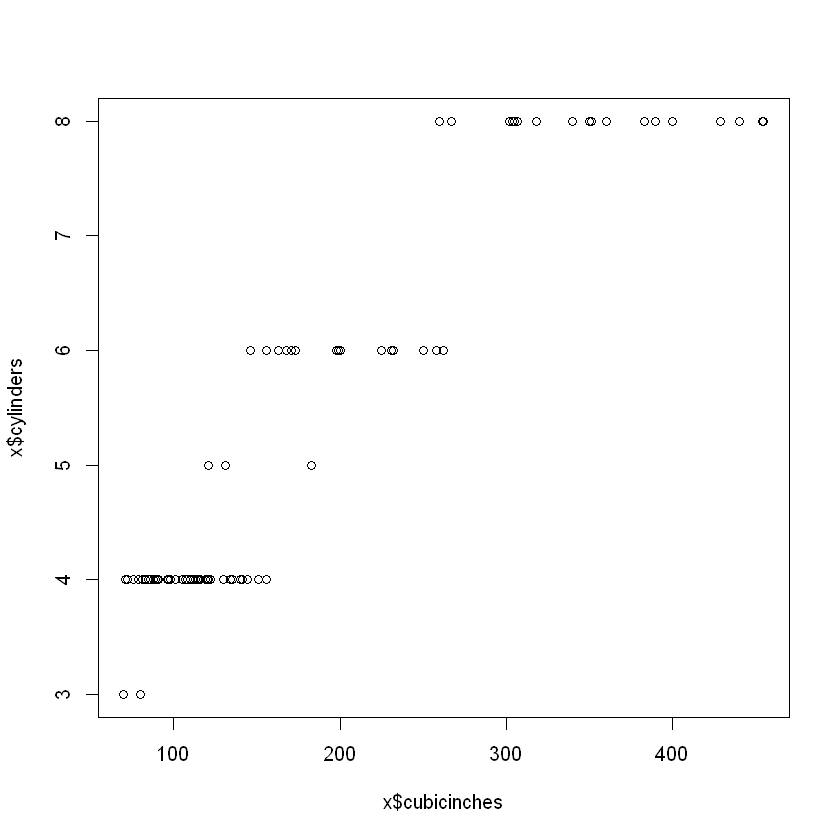

In [110]:
plot(x$cubicinches, x$cylinders)

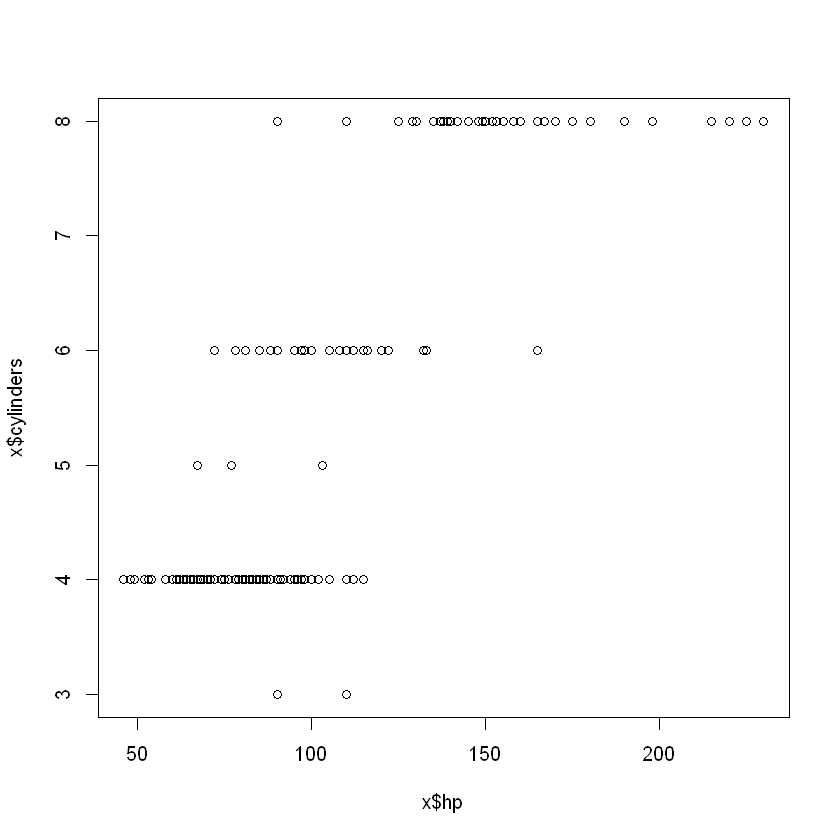

In [96]:
plot(x$hp, x$cylinders)

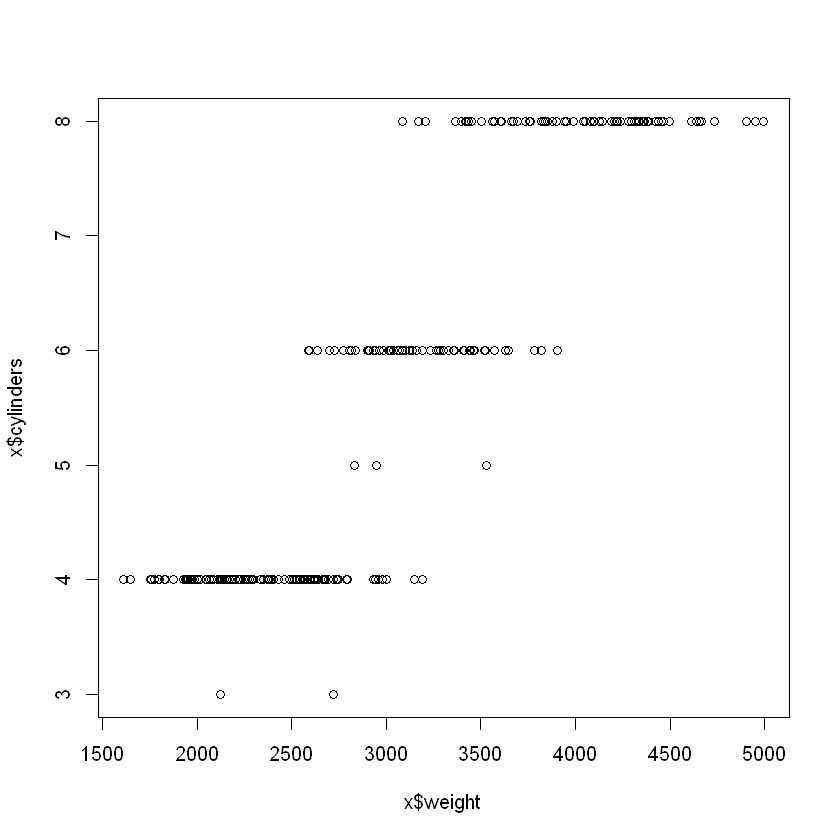

In [111]:
plot(x$weight, x$cylinders)

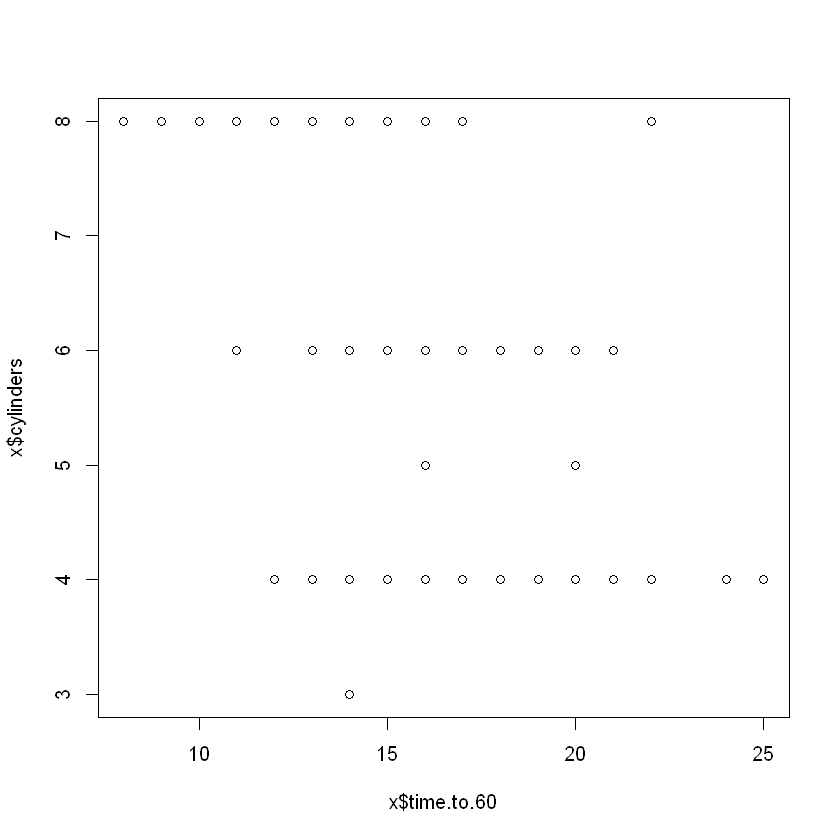

In [114]:
plot(x$time.to.60, x$cylinders)

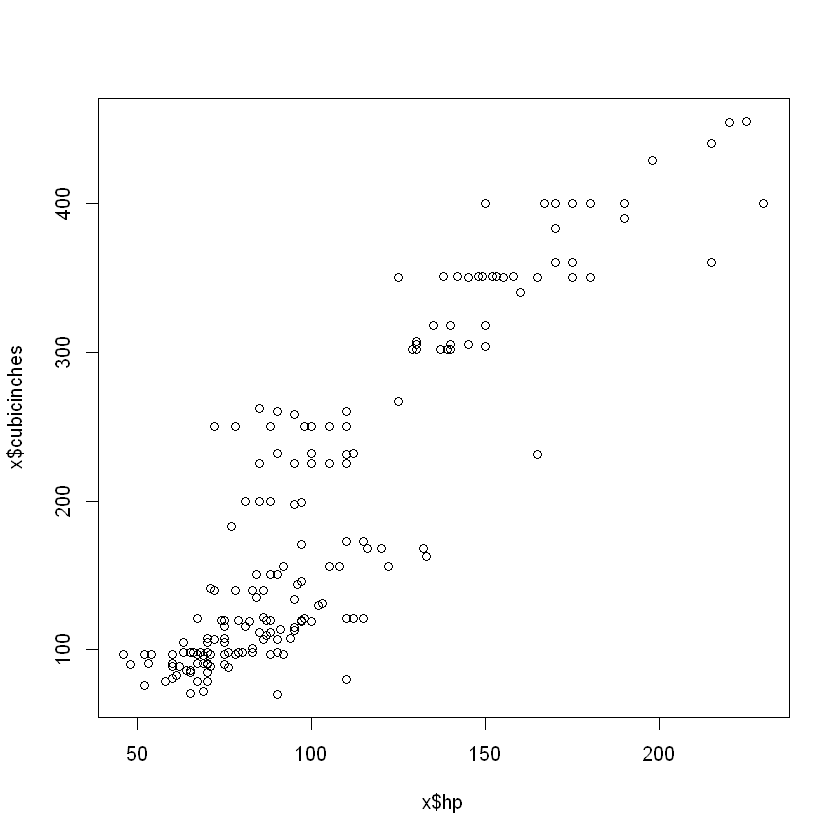

In [115]:
plot(x$hp, x$cubicinches)

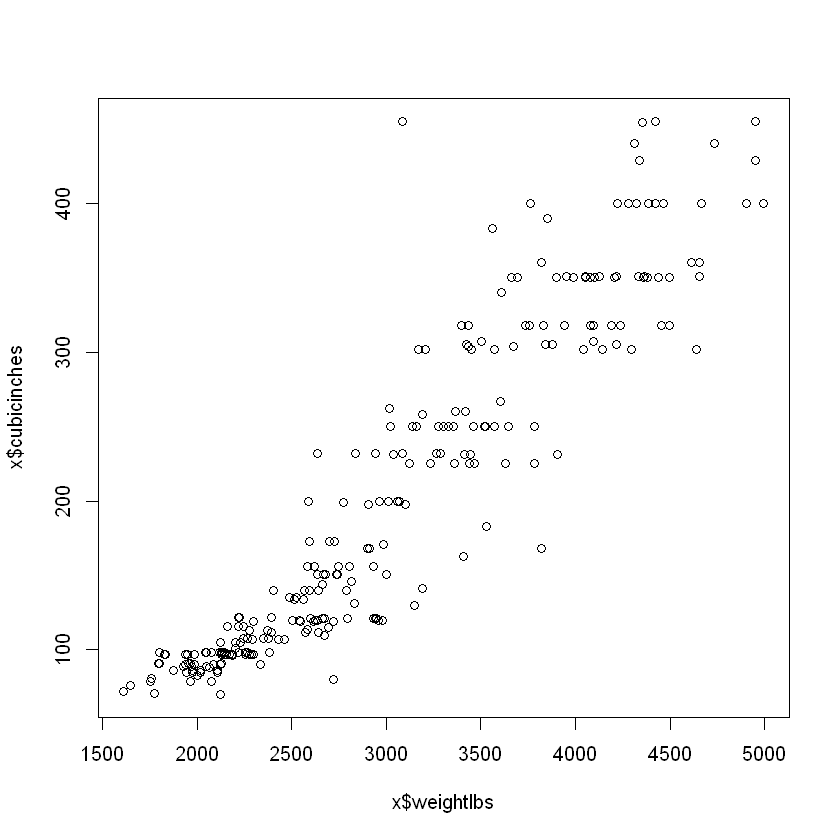

In [116]:
plot(x$weightlbs, x$cubicinches)

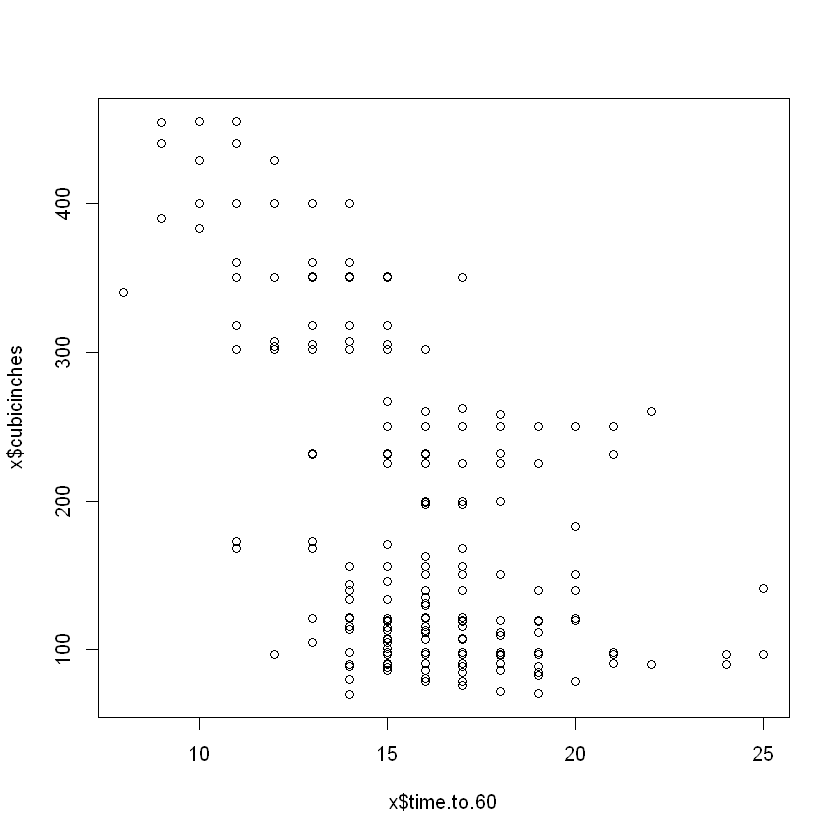

In [117]:
plot(x$time.to.60, x$cubicinches)

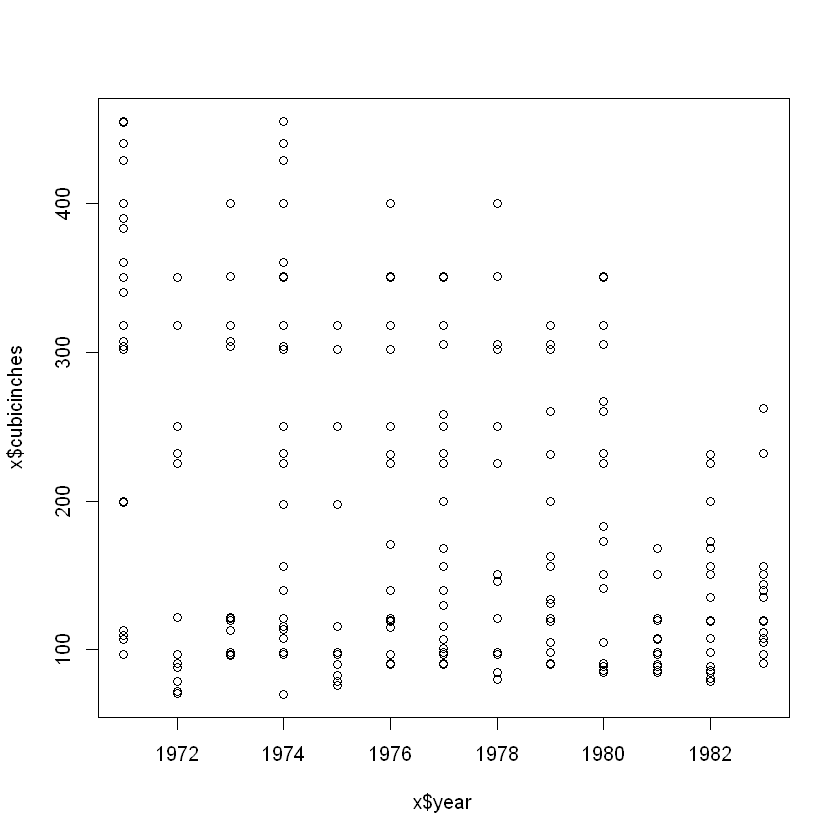

In [118]:
plot(x$year, x$cubicinches)

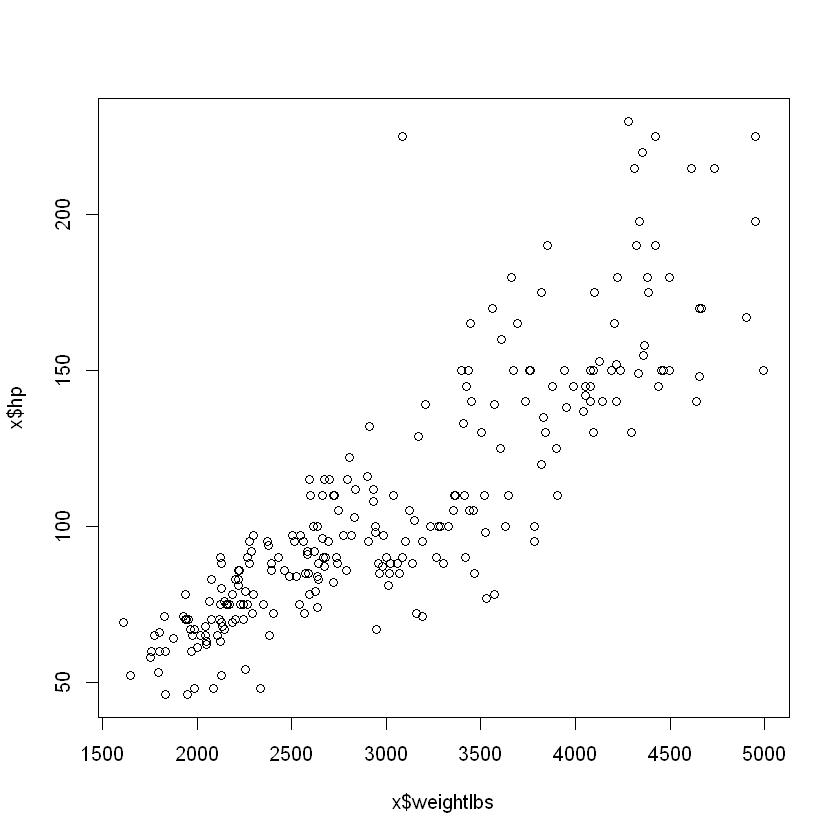

In [119]:
plot(x$weightlbs, x$hp)

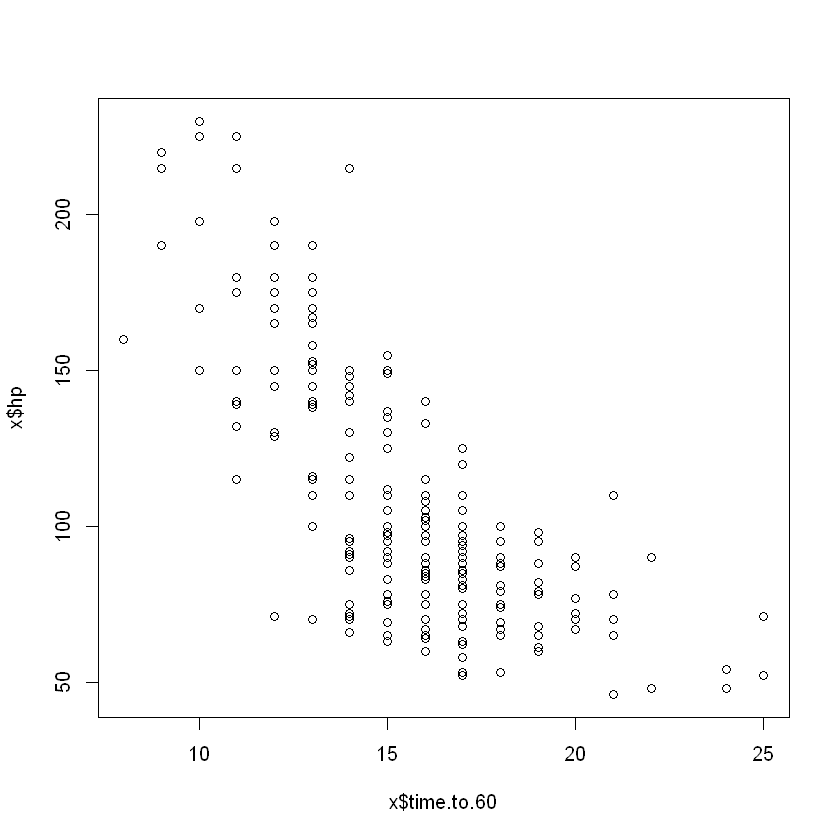

In [120]:
plot(x$time.to.60, x$hp)

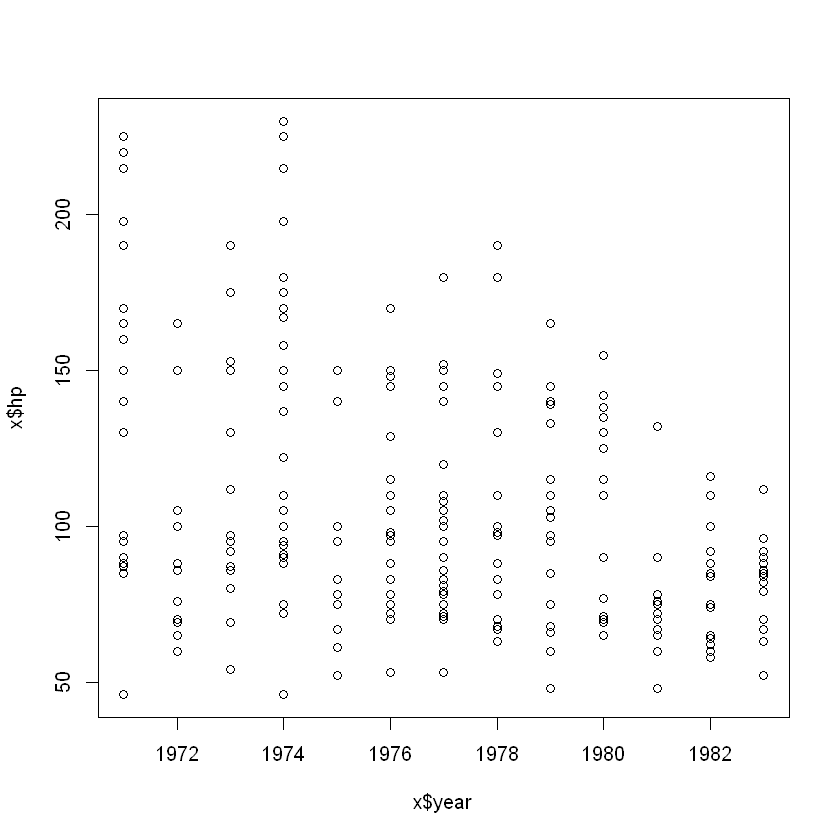

In [121]:
plot(x$year, x$hp)

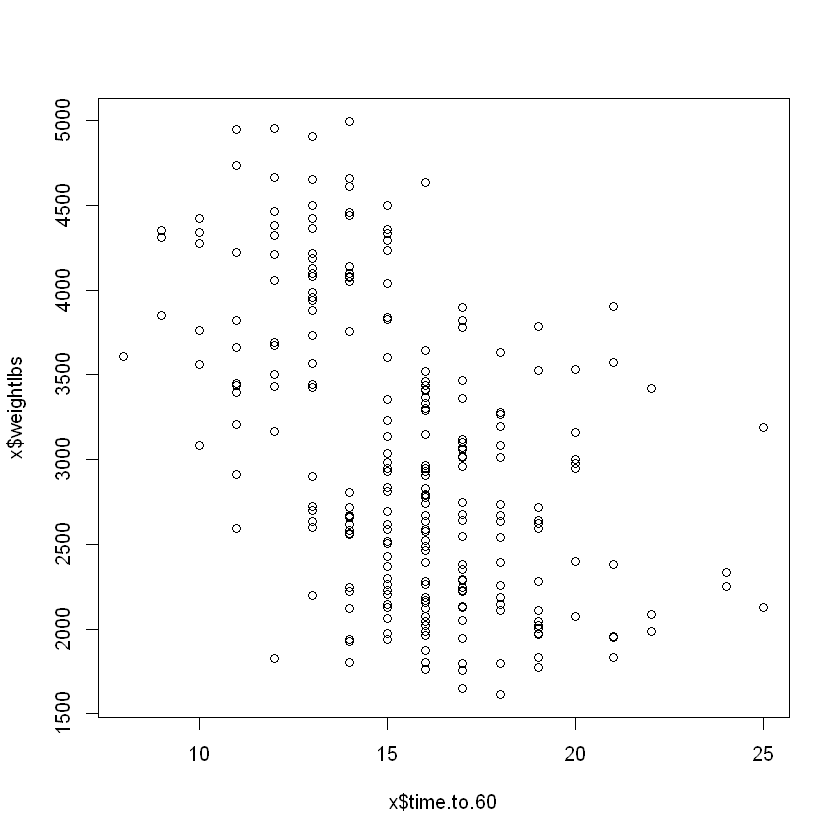

In [122]:
plot(x$time.to.60, x$weightlbs)

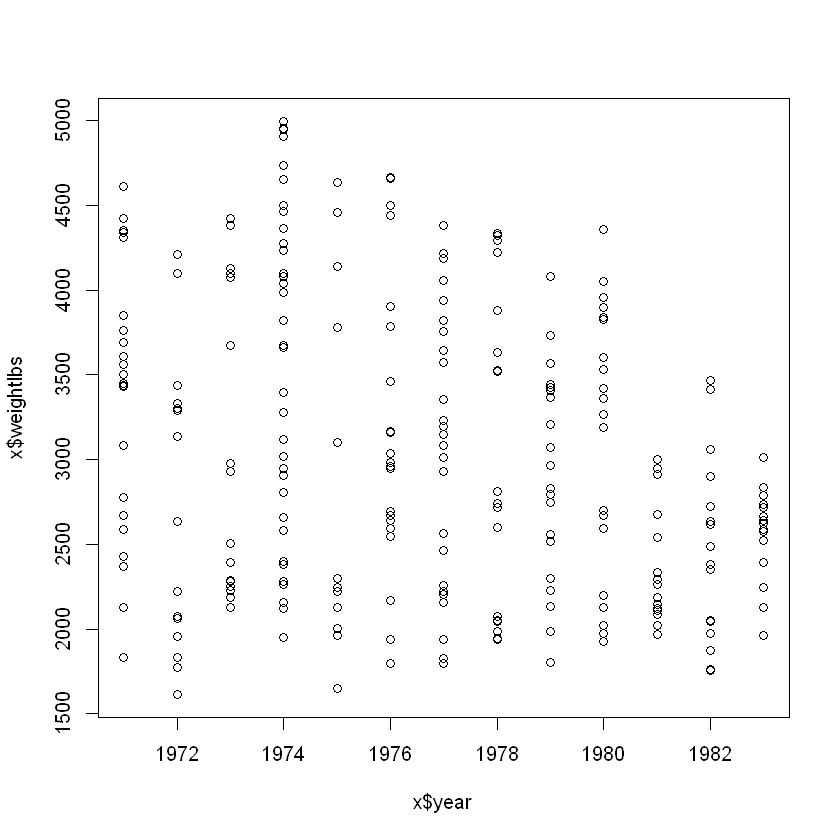

In [123]:
plot(x$year, x$weightlbs)

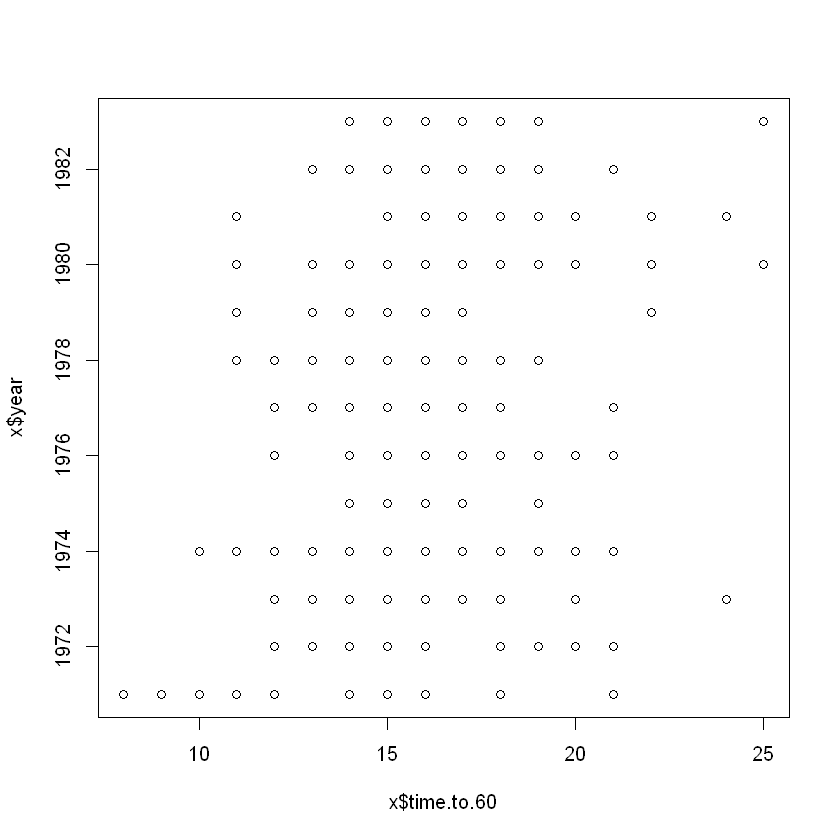

In [124]:
plot(x$time.to.60, x$year)

In [6]:
#Simple Linear Regression

In [125]:
lmod = lm(data$mpg ~ data$cubicinches, data = data)

In [126]:
summary(lmod)


Call:
lm(formula = data$mpg ~ data$cubicinches, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.771  -3.212  -0.318   2.302  18.315 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.812982   0.614312   56.67   <2e-16 ***
data$cubicinches -0.057739   0.002681  -21.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.691 on 254 degrees of freedom
Multiple R-squared:  0.6461,	Adjusted R-squared:  0.6448 
F-statistic: 463.8 on 1 and 254 DF,  p-value: < 2.2e-16


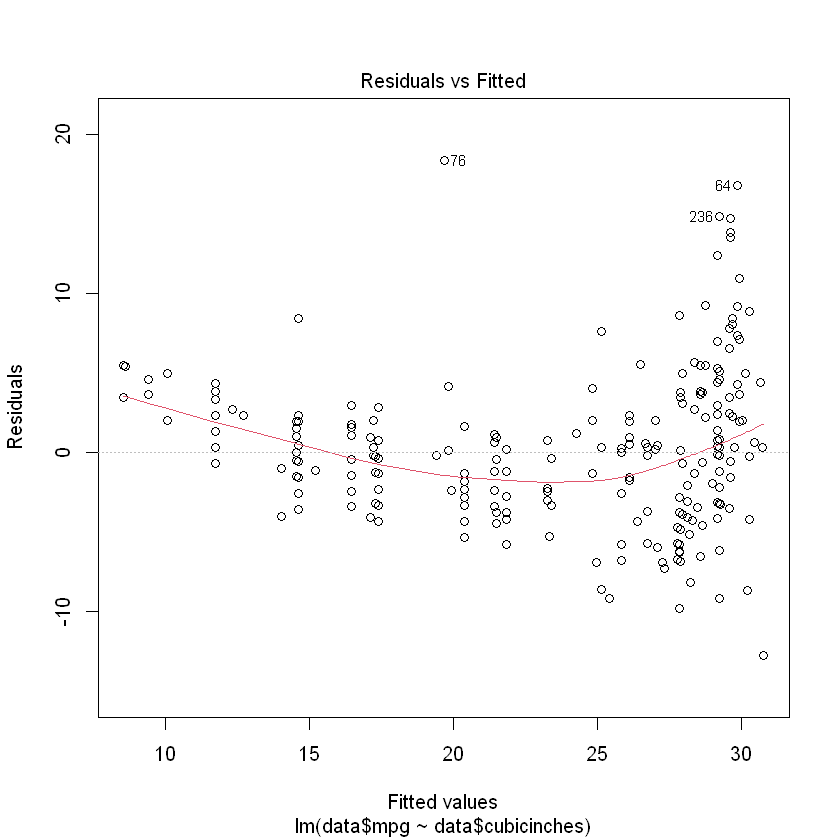

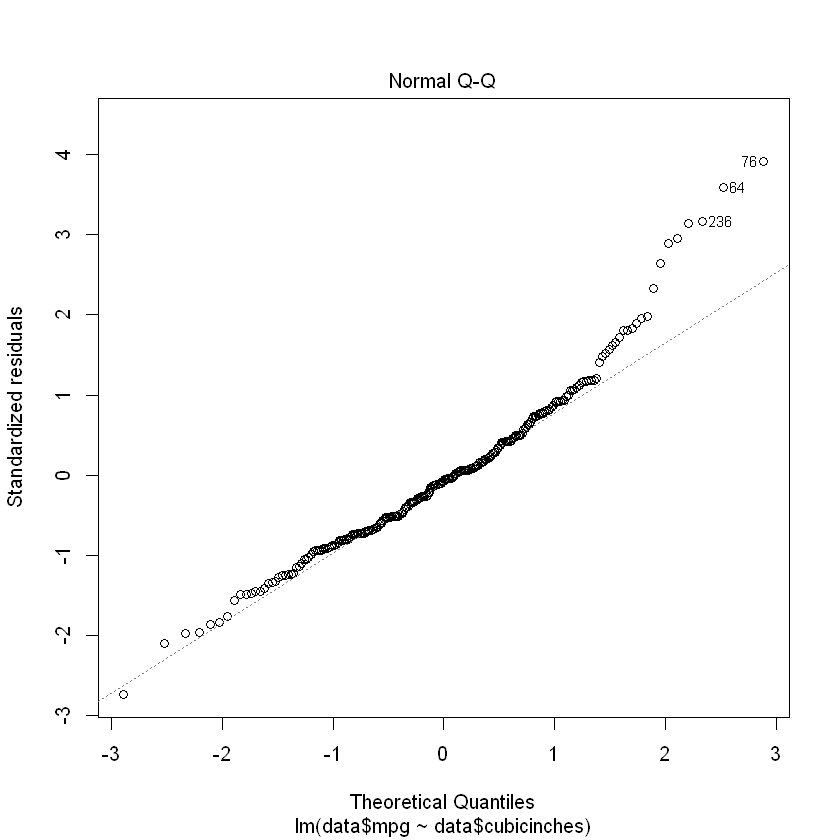

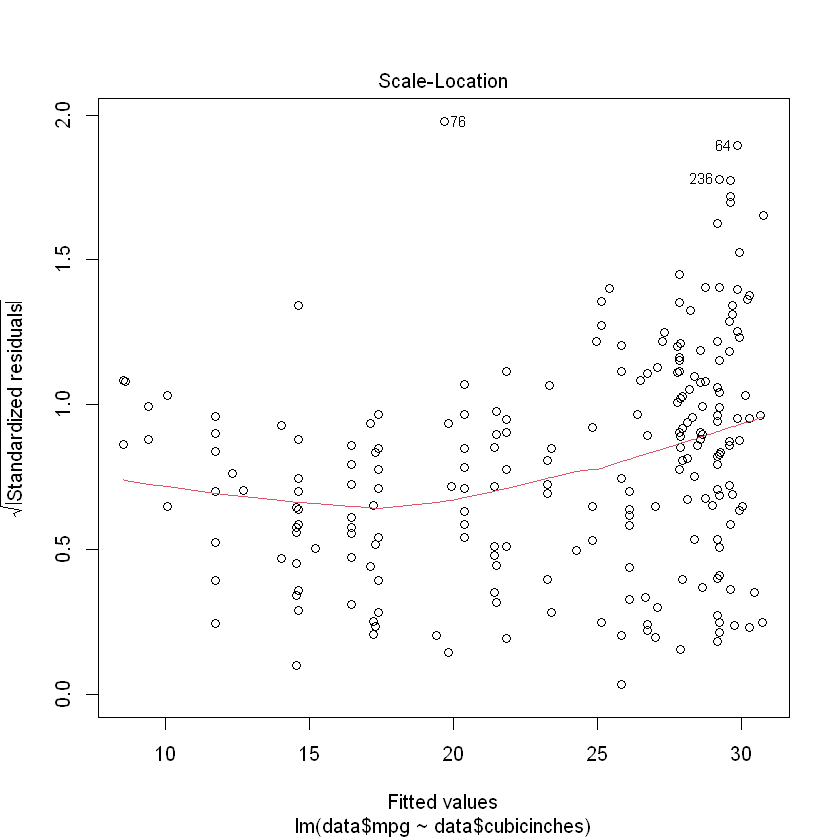

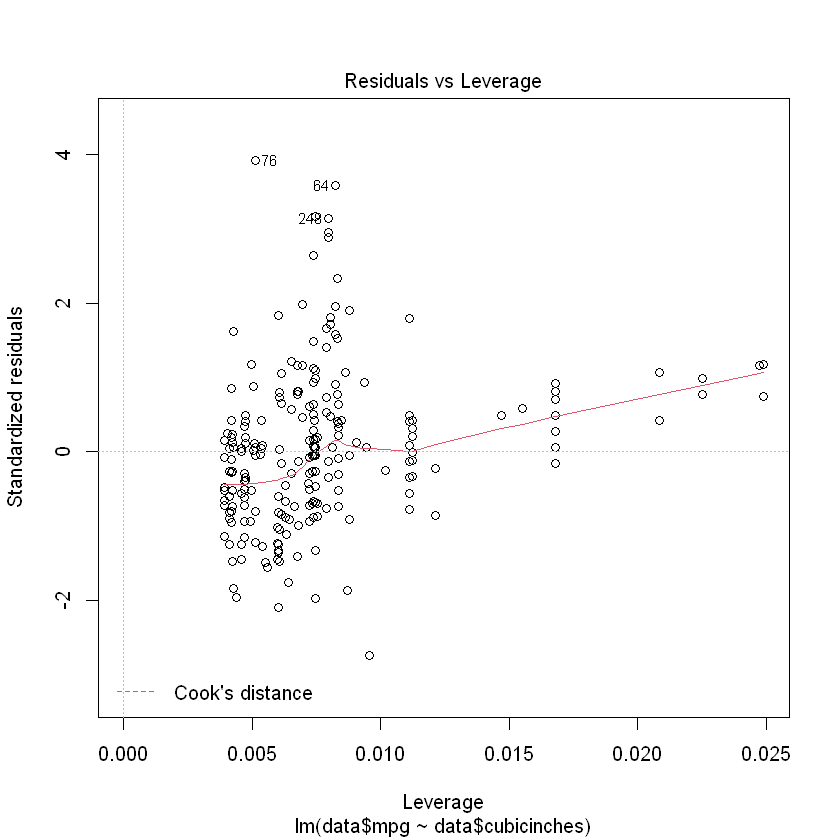

In [127]:
plot(lmod)

In [7]:
#Residuals for the power output, given the volume of the engine
x = data$cubicinches
y = data$hp

In [8]:
lmod = lm(y ~ x, data = data)

In [9]:
e = resid(lmod)

In [48]:
#Residuals manually
yhat = predict(lmod)

In [49]:
max(abs(e - (y - yhat)))
max(abs(e - (y - coef(lmod)[1] - coef(lmod)[2] * x)))

[1] 1.49214e-13

[1] 1.527667e-13

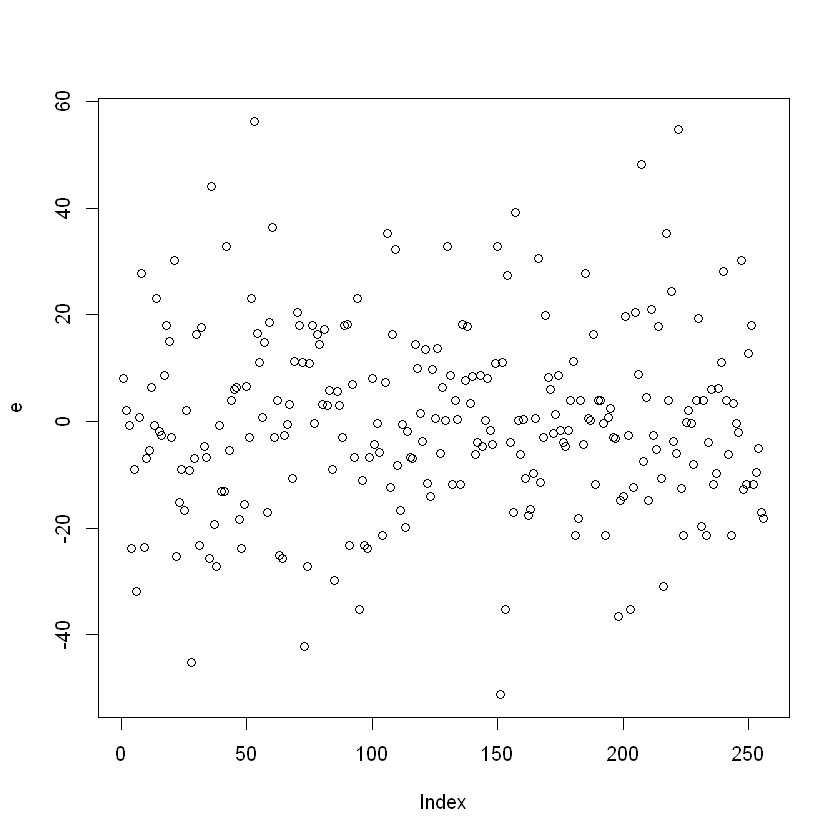

In [10]:
plot(e)

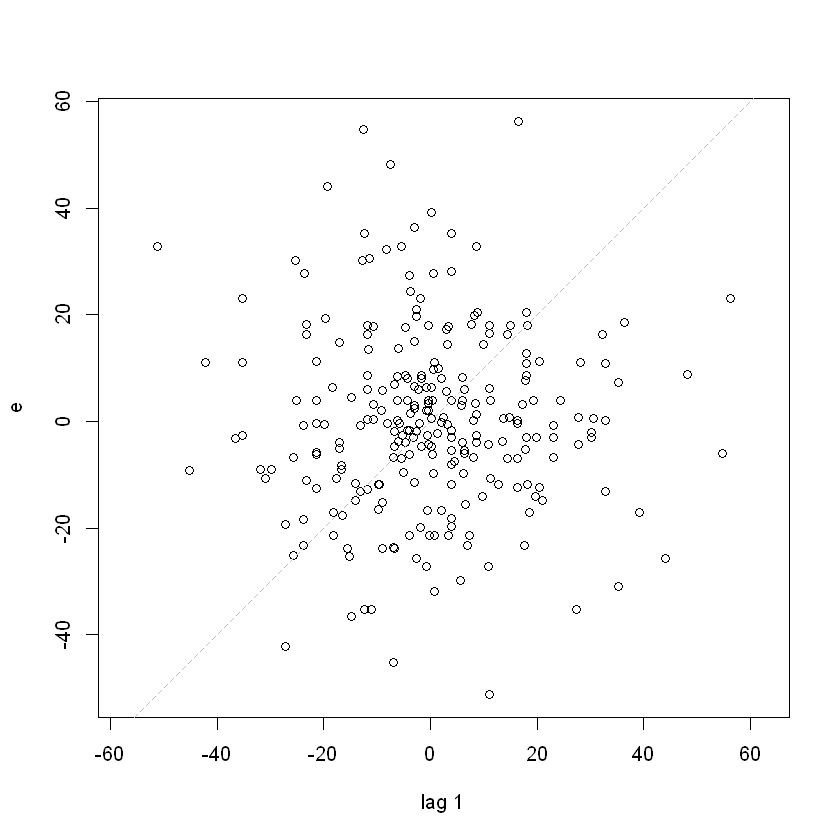

In [12]:
lag.plot(e)

In [45]:
windows.options(width = 20, height = 20)

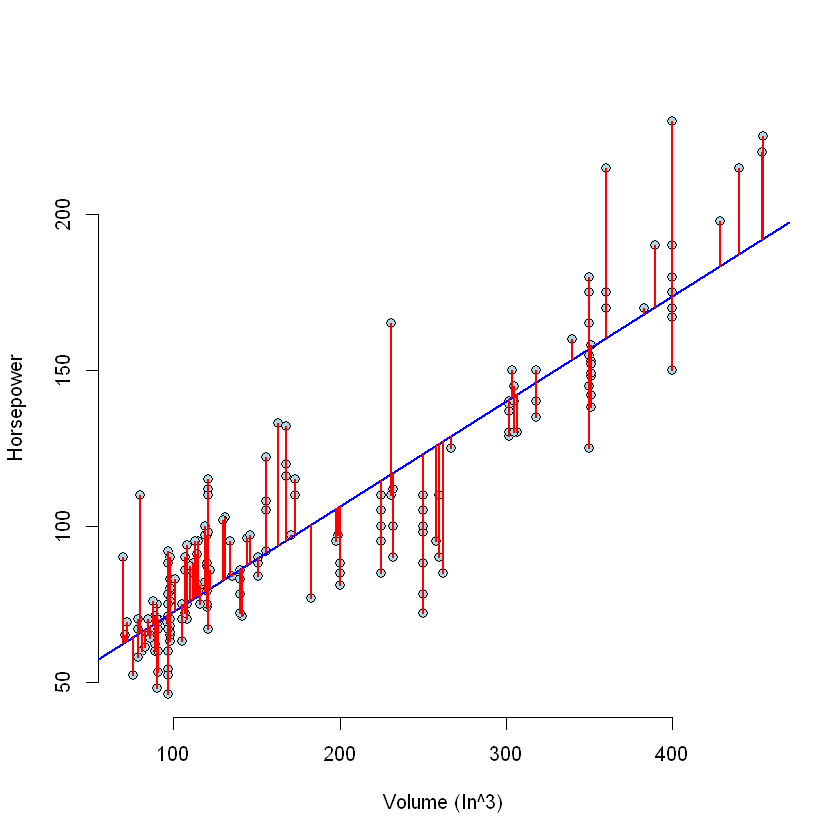

In [46]:
plot(x, y, xlab = "Volume (In^3)", ylab = "Horsepower", bg = "lightblue", col = "black", cex = 1.1, pch = 21, frame = FALSE)
abline(lmod, lwd = 2, col = "blue")

for(i in 1 : length(x))
    lines(c(x[i], x[i]), c(y[i], yhat[i]), col = "red", lwd = 2)

In [ ]:
#This scatterplot isn't quite useful for assesing residual variation

In [47]:
windows.options(reset = TRUE)

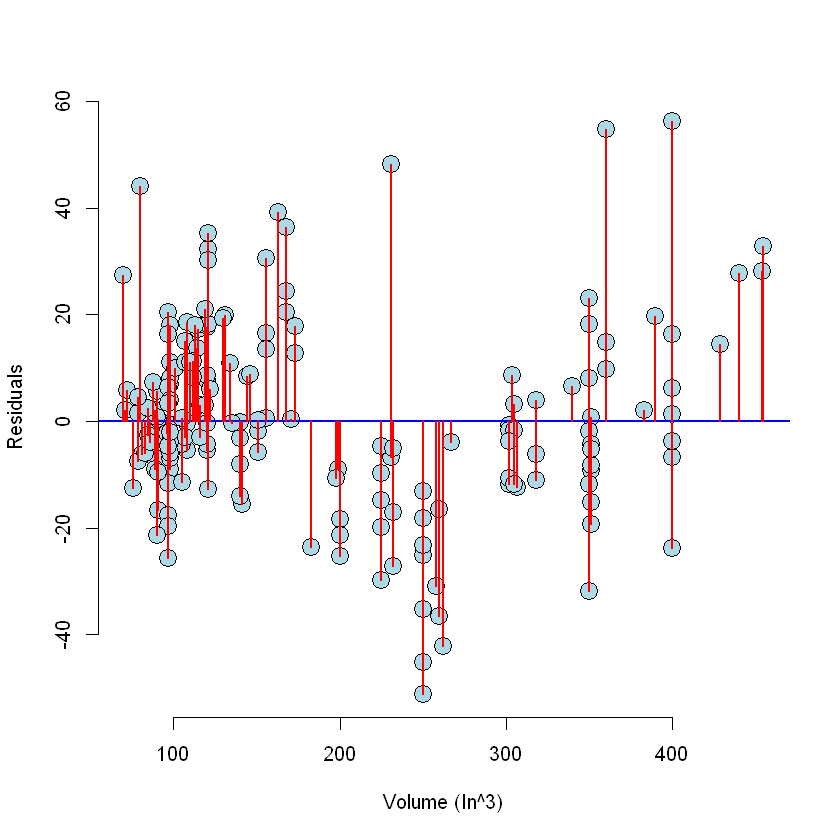

In [52]:
plot(x, e, xlab = "Volume (In^3)", ylab = "Residuals", bg = "lightblue", col = "black", cex = 2, pch = 21, frame = FALSE)
abline(h = 0, lwd = 2, col = "blue")

for(i in 1 : length(x))
    lines(c(x[i], x[i]), c(e[i], 0), col = "red", lwd = 2)

In [54]:
#When looking for at a residual plot, were looking for any sort of pattern. And as we can see there are some patterns.
#There are multiple engines with the same volume, but the residuals of the power output vary.

In [55]:
summary(lmod)


Call:
lm(formula = y ~ x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.191 -10.681  -0.534   8.673  56.271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.961847   2.244294   17.36   <2e-16 ***
x            0.336918   0.009795   34.40   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.14 on 254 degrees of freedom
Multiple R-squared:  0.8233,	Adjusted R-squared:  0.8226 
F-statistic:  1183 on 1 and 254 DF,  p-value: < 2.2e-16


In [56]:
#Residual standard error from summary function
summary(lmod)$sigma

[1] 17.13814

In [57]:
#Residual standard error manually calculated
sqrt(sum(resid(lmod)^2)/(n-2))

[1] 17.13814

In [6]:
#Multivariate Linear Regression

x1 = data$weightlbs
x2 = data$hp
x3 = data$cubicinches
y = data$mpg

In [7]:
ey = resid(lm(y ~ x2 + x3))
ex1 = resid(lm(x1 ~ x2 + x3))

In [8]:
sum(ey * ex1) / sum(ex1 ^ 2)

[1] -0.004967081

In [64]:
coef(lm(ey ~ ex1 - 1))
#Fitting the full linear model to check that it agrees
coef(lm(y~x1+x2+x3))

ex1 
-0.004967081

(Intercept)           x1           x2           x3 
44.189827273 -0.004967081 -0.043798205 -0.006912178

In [9]:
lmod = lm(y ~ x1 + x2 + x3)

In [10]:
summary(lmod)


Call:
lm(formula = y ~ x1 + x2 + x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2141  -2.9161  -0.3347   2.2012  16.3320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.1898273  1.5203189  29.066  < 2e-16 ***
x1          -0.0049671  0.0008717  -5.698 3.37e-08 ***
x2          -0.0437982  0.0160228  -2.733  0.00671 ** 
x3          -0.0069122  0.0081663  -0.846  0.39812    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.341 on 252 degrees of freedom
Multiple R-squared:  0.6994,	Adjusted R-squared:  0.6958 
F-statistic: 195.4 on 3 and 252 DF,  p-value: < 2.2e-16


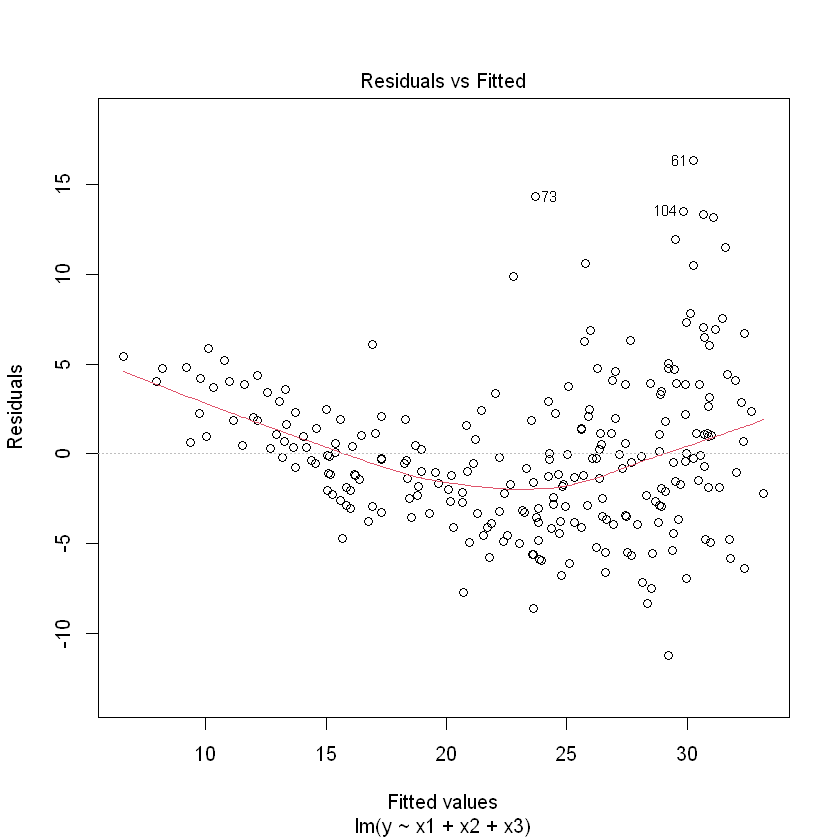

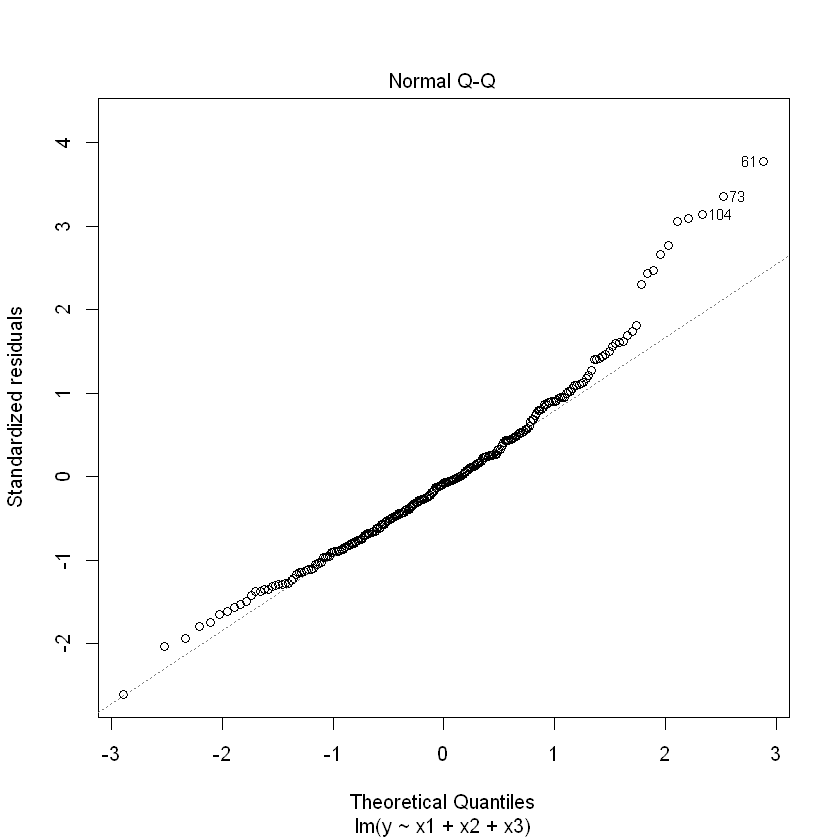

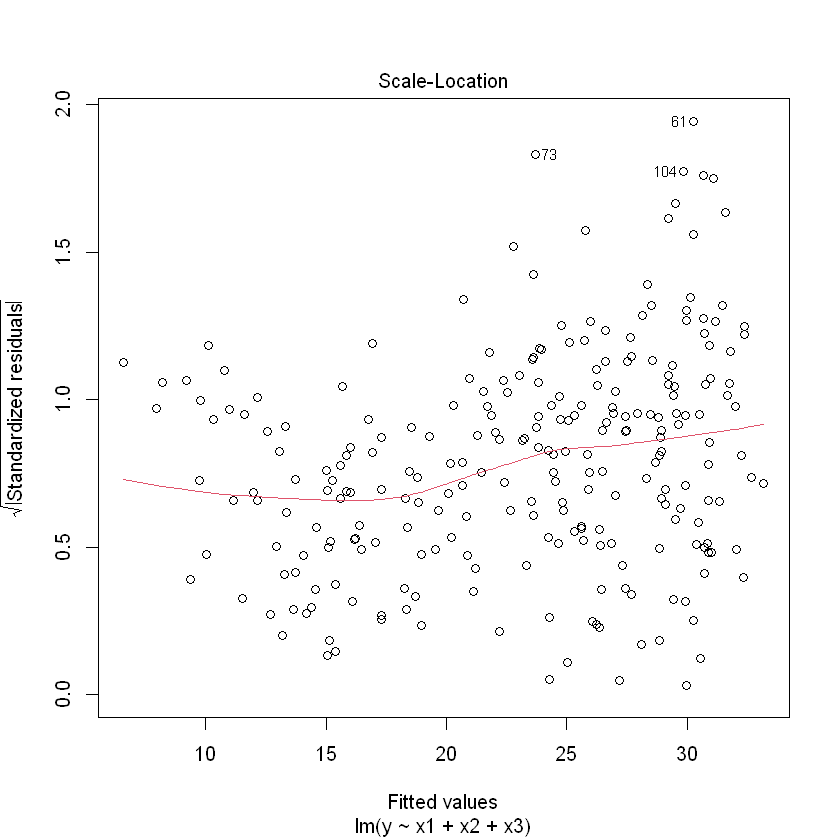

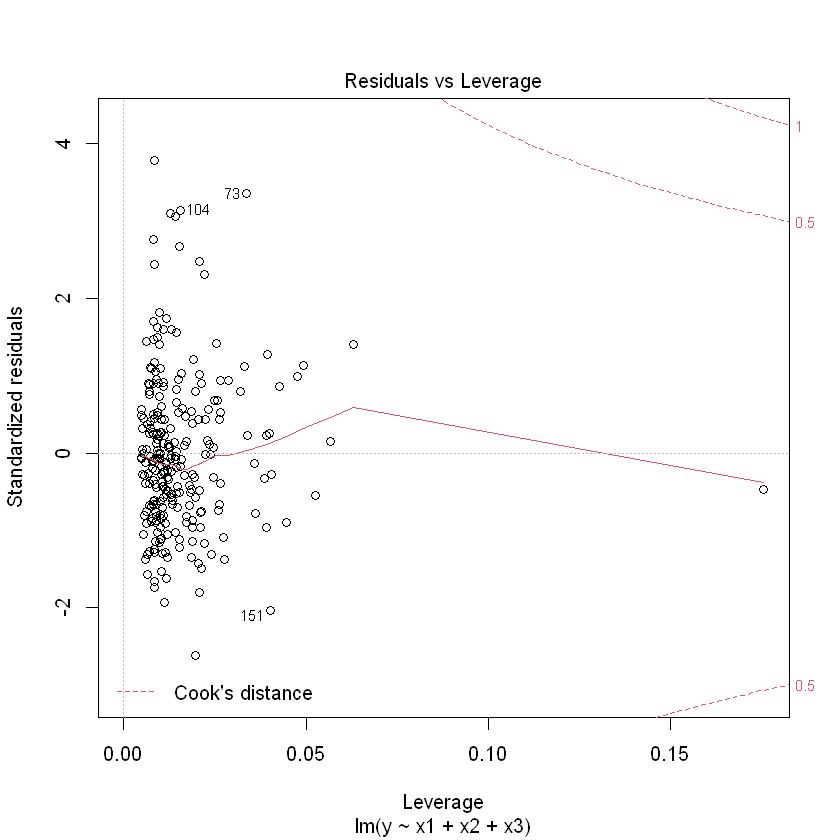

In [11]:
plot(lmod)

In [17]:
install.packages("car") 
library(car)

Installing package into 'C:/Users/tushe/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tushe\AppData\Local\Temp\Rtmps9Q4Di\downloaded_packages


Warning message:
"package 'car' was built under R version 4.0.5"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.0.3"

Attaching package: 'car'


The following object is masked from 'package:VIF':

    vif




In [18]:
vif(lmod)

x1        x2        x3 
 7.526012  5.751004 10.834555

In [3]:
#PCA

In [65]:
pca = prcomp(x, center = TRUE, scale. = TRUE)

In [66]:
pca

Standard deviations (1, .., p=6):
[1] 2.0820915 0.9243575 0.7651814 0.3597602 0.2479357 0.1845425

Rotation (n x k) = (6 x 6):
                   PC1        PC2        PC3         PC4         PC5
cylinders   -0.4518369 0.16443290 -0.1928675  0.68214614 -0.16909138
cubicinches -0.4656390 0.13603654 -0.1647786  0.15111256 -0.19657613
hp          -0.4603687 0.02676774  0.1321870 -0.60626377 -0.57627016
weightlbs   -0.4408182 0.23866160 -0.3238917 -0.34997265  0.71208046
time.to.60   0.3529236 0.14037894 -0.8617747 -0.14707768 -0.29966081
year         0.2195646 0.93652216  0.2657352 -0.01315948 -0.06183413
                    PC6
cylinders    0.48753680
cubicinches -0.82221969
hp           0.26500500
weightlbs    0.11947657
time.to.60   0.04067597
year        -0.01028621

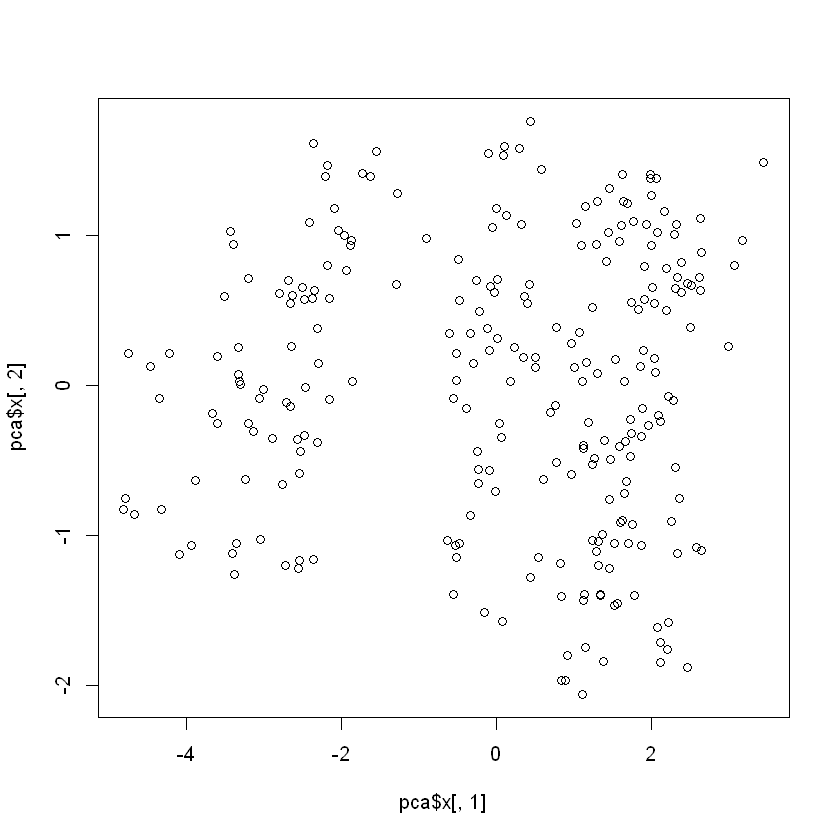

In [67]:
plot(pca$x[, 1], pca$x[, 2])

In [68]:
pca$sdev

[1] 2.0820915 0.9243575 0.7651814 0.3597602 0.2479357 0.1845425

In [69]:
pca.var = pca$sdev^2

In [70]:
pca.var.per = round(pca.var/sum(pca.var)*100, 1)

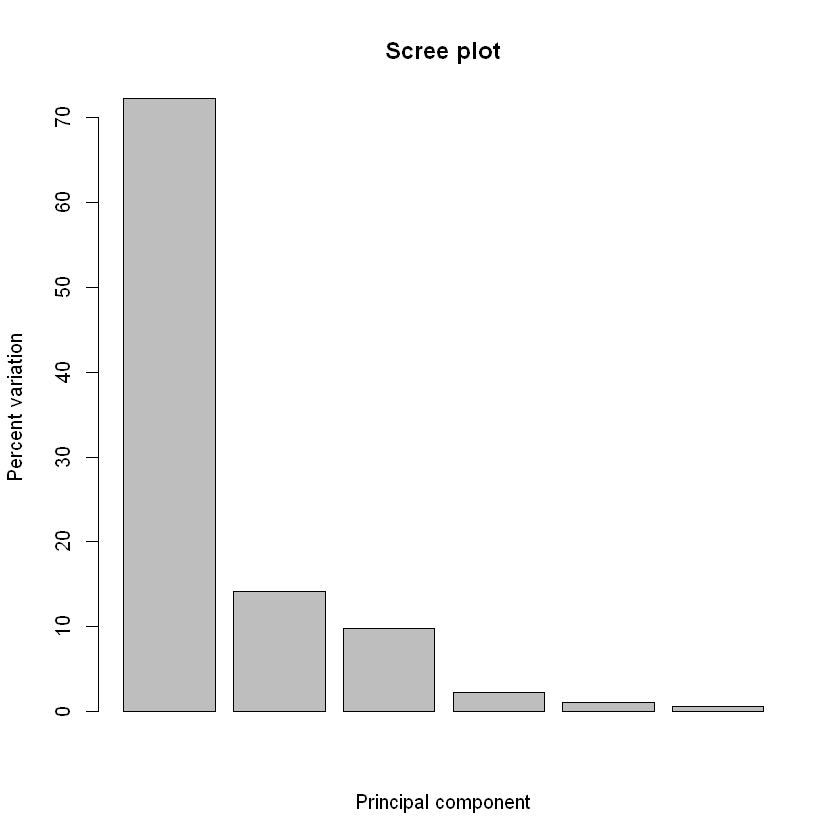

In [71]:
barplot(pca.var.per, main = "Scree plot", xlab = "Principal component", ylab = "Percent variation")

In [79]:
#Poisson regression
poismod = glm(data$hp ~ data$cylinder, family = "poisson", data = data)

In [80]:
summary(poismod)


Call:
glm(formula = data$hp ~ data$cylinder, family = "poisson", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7687  -1.3304  -0.5103   1.1028   5.5012  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.621547   0.021802  166.11   <2e-16 ***
data$cylinder 0.178809   0.003405   52.51   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3704.87  on 255  degrees of freedom
Residual deviance:  941.81  on 254  degrees of freedom
AIC: 2595.4

Number of Fisher Scoring iterations: 4


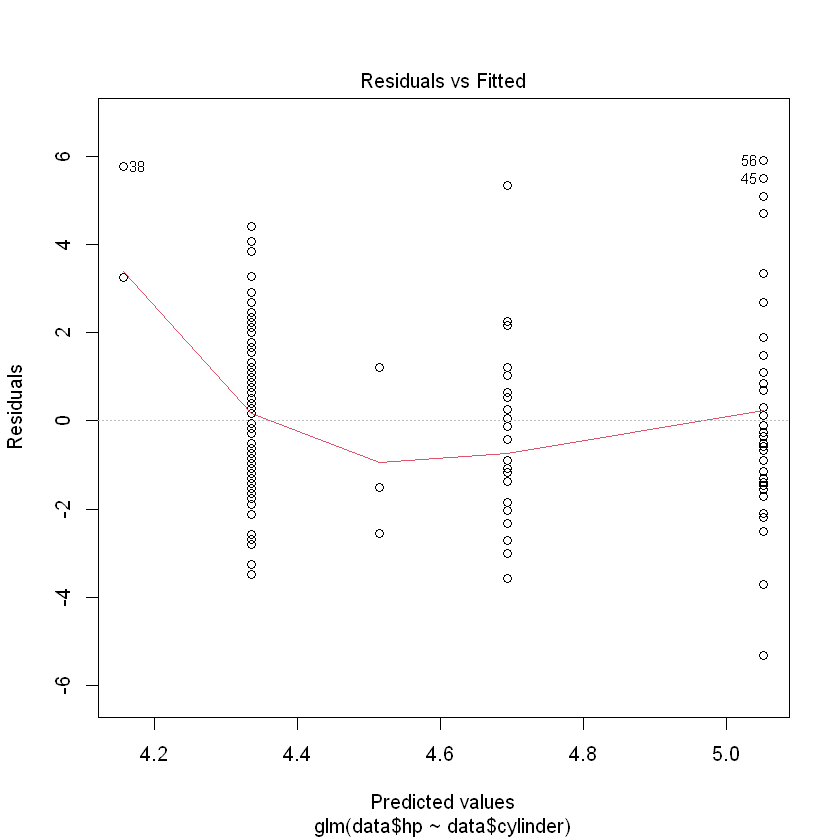

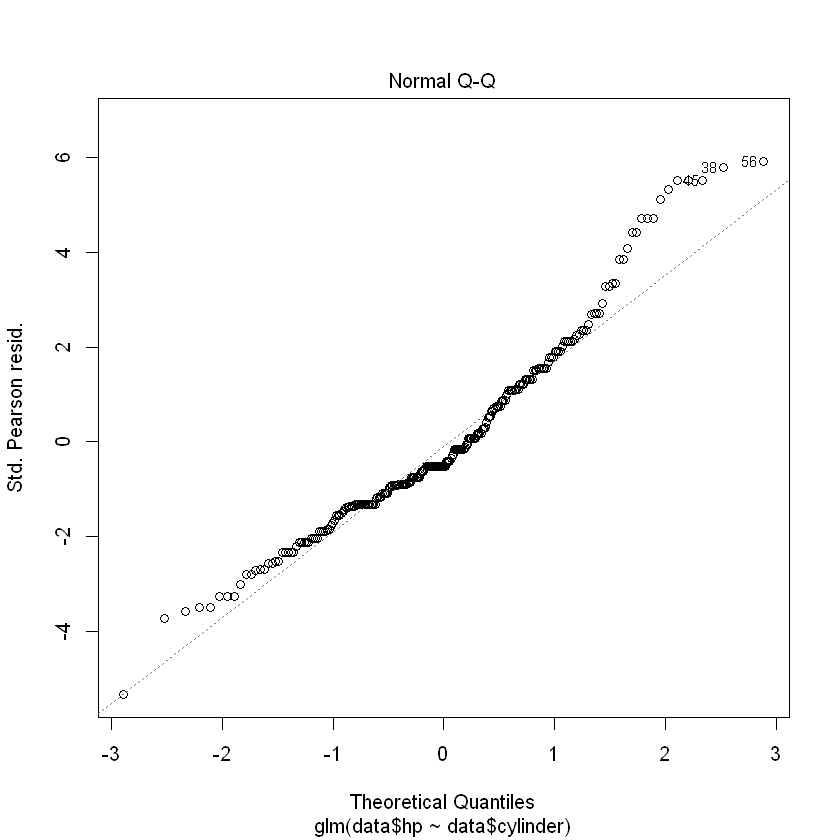

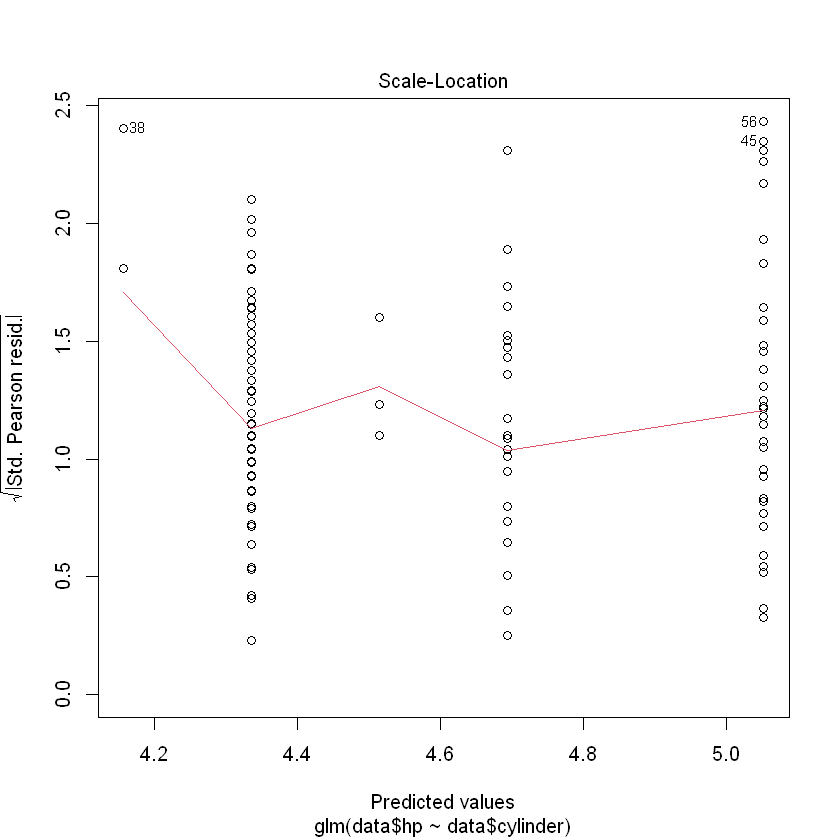

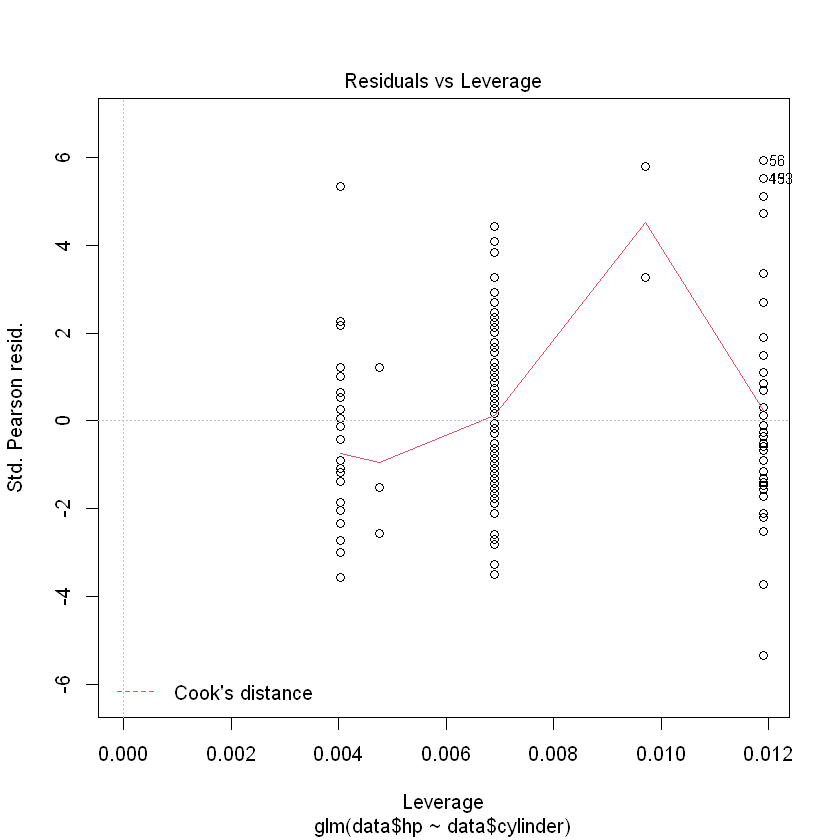

In [81]:
plot(poismod)

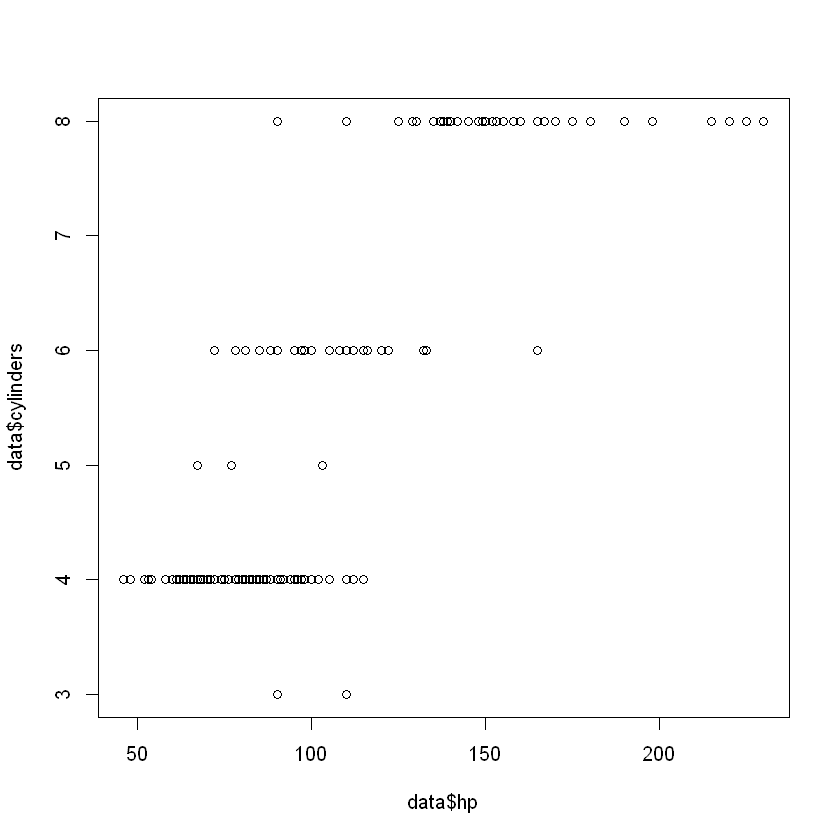

In [86]:
plot(data$hp, data$cylinders)

In [1]:
#Logistic Regression

In [13]:
raw_data = read.csv("D:\\Social_Network_Ads.csv")

In [11]:
#Data cleaning

In [14]:
data = na.omit(raw_data)

In [6]:
head(data)

,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


In [10]:
str(data)

'data.frame':	400 obs. of  5 variables:
 $ User.ID        : int  15624510 15810944 15668575 15603246 15804002 15728773 15598044 15694829 15600575 15727311 ...
 $ Gender         : chr  "Male" "Male" "Female" "Female" ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


In [15]:
data[data$Gender == "Male", ]$Gender = 1
data[data$Gender == "Female", ]$Gender = 0

In [27]:
corr_matrix = round(cor(x), 2)

In [28]:
corr_matrix

,Gender,Age,EstimatedSalary,Purchased
Gender,1.00,-0.07,-0.06,-0.04
Age,-0.07,1.00,0.16,0.62
EstimatedSalary,-0.06,0.16,1.00,0.36
Purchased,-0.04,0.62,0.36,1.00


In [16]:
head(data)

,User.ID,Gender,Age,EstimatedSalary,Purchased
,<int>,<chr>,<int>,<int>,<int>
1,15624510,1,19,19000,0
2,15810944,1,35,20000,0
3,15668575,0,26,43000,0
4,15603246,0,27,57000,0
5,15804002,1,19,76000,0
6,15728773,1,27,58000,0


In [25]:
logmod = glm(Purchased ~ Gender + Age + EstimatedSalary, family = "binomial", data = data)

In [26]:
summary(logmod)


Call:
glm(formula = Purchased ~ Gender + Age + EstimatedSalary, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9109  -0.5218  -0.1406   0.3662   2.4254  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -1.278e+01  1.359e+00  -9.405  < 2e-16 ***
Gender           3.338e-01  3.052e-01   1.094    0.274    
Age              2.370e-01  2.638e-02   8.984  < 2e-16 ***
EstimatedSalary  3.644e-05  5.473e-06   6.659 2.77e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 521.57  on 399  degrees of freedom
Residual deviance: 275.84  on 396  degrees of freedom
AIC: 283.84

Number of Fisher Scoring iterations: 6
